In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [4]:
titanic = pd.read_csv('/content/titanic.csv')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


univariate analysis 

In [6]:
titanic.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

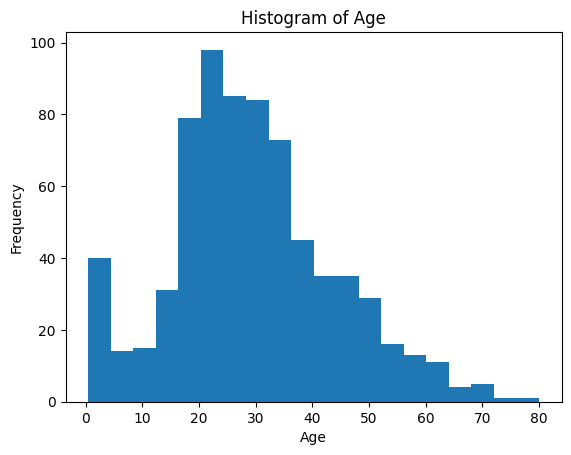

In [7]:

# Histogram of a numerical variable 
titanic['age'].plot(kind='hist',bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()



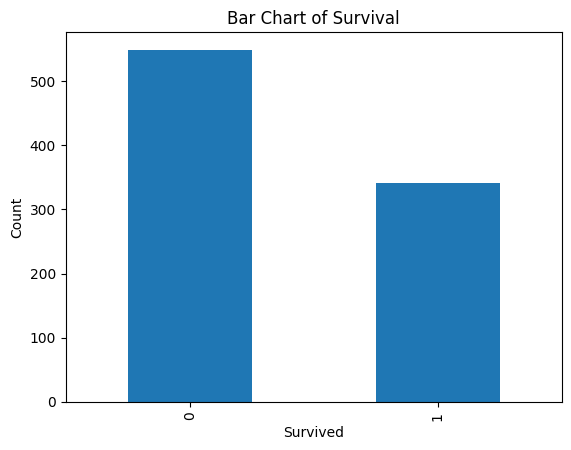

In [8]:
# Bar chart of a categorical variable
titanic['survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar Chart of Survival')
plt.show()



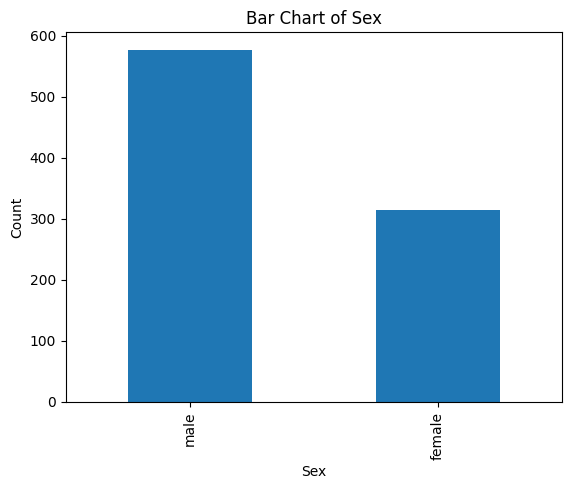

In [9]:
# Bar chart of another categorical variable
titanic['sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Chart of Sex')
plt.show()

Bivariate Analysis

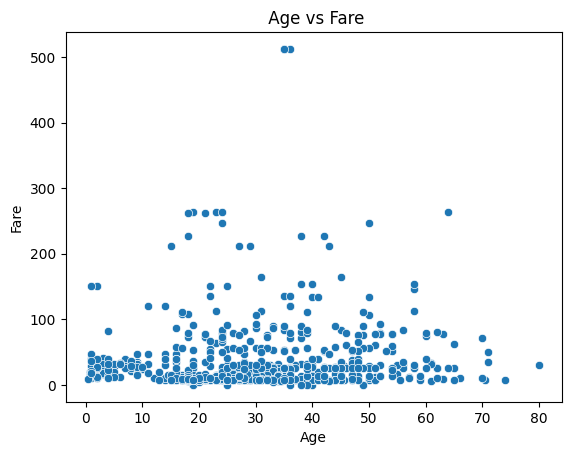

In [11]:
sns.scatterplot(data=titanic, x='age', y='fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title(' Age vs Fare')
plt.show()

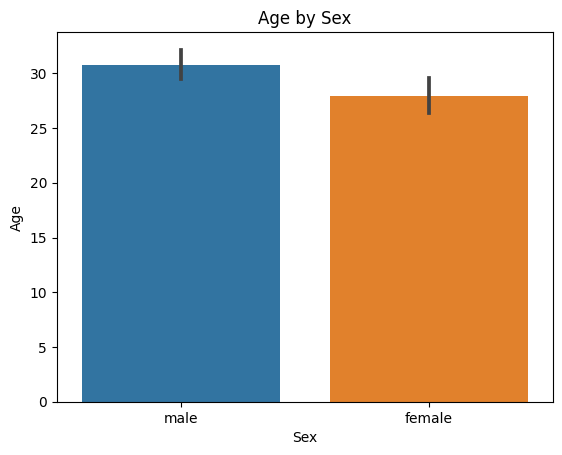

In [12]:

sns.barplot(data=titanic, x='sex', y='age')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age by Sex')
plt.show()

<ipython-input-13-17f1d5ca4153>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


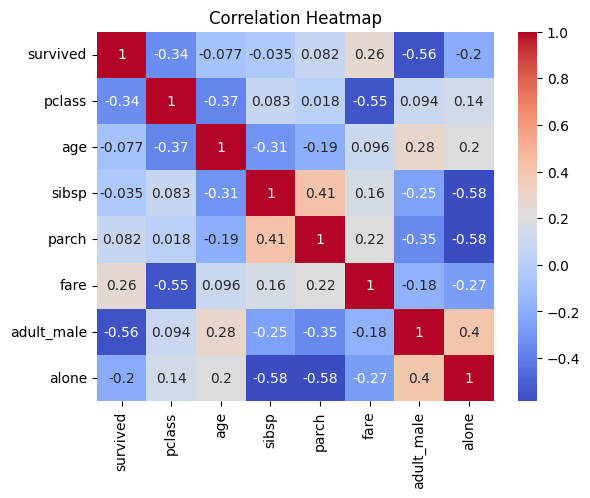

In [13]:
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Multivariate Analysis

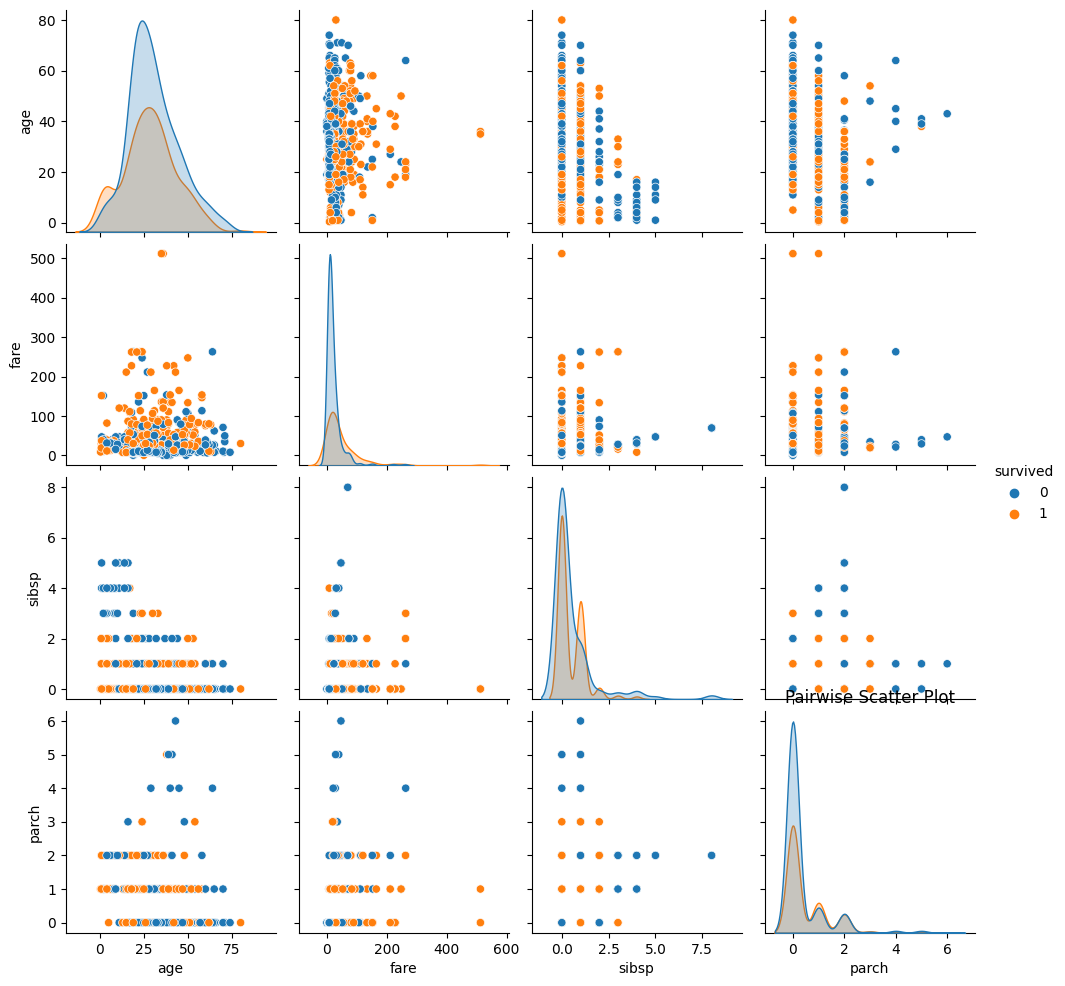

In [14]:
sns.pairplot(data=titanic, vars=['age', 'fare', 'sibsp', 'parch'], hue='survived')
plt.title('Pairwise Scatter Plot')
plt.show()

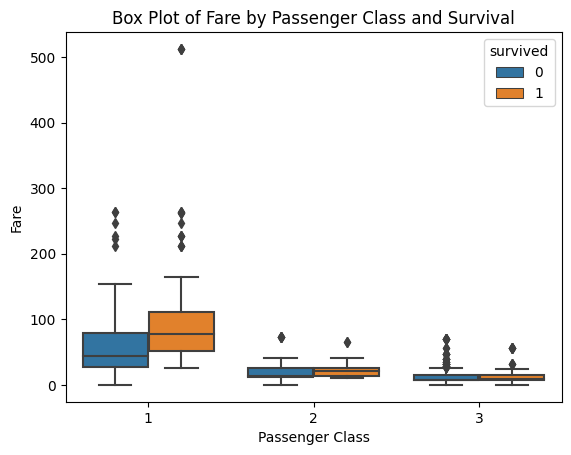

In [15]:
sns.boxplot(data=titanic, x='pclass', y='fare', hue='survived')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Box Plot of Fare by Passenger Class and Survival')
plt.show()

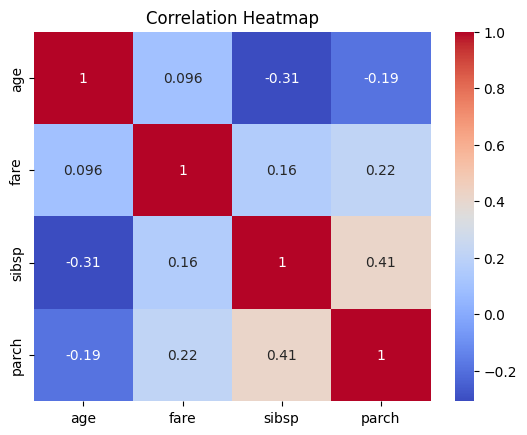

In [16]:

corr_matrix = df[['age', 'fare', 'sibsp', 'parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Statistics


In [18]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Null values Handling

In [20]:
df['age'].fillna(df['age'].mean(), inplace=True)


In [21]:
df['embarked'].fillna(df['embarked'].mode(), inplace=True)



In [22]:
df['deck'].fillna(df['deck'].mode()[0], inplace=True)


In [23]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [24]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [25]:
z_score_threshold = 3
z_scores = np.abs((df - df.mean()) / df.std())


<ipython-input-25-df27736f6c86>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
<ipython-input-25-df27736f6c86>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


In [26]:

outliers = (z_scores > z_score_threshold)


In [27]:

# Replace outliers with NaN or a specific value
df[outliers] = np.nan  



In [28]:
# Check the replaced outliers in the DataFrame
print(df[outliers])

     survived  pclass  sex  age  sibsp  parch  fare embarked class  who  \
0         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
1         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
2         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
3         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
4         NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
..        ...     ...  ...  ...    ...    ...   ...      ...   ...  ...   
886       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
887       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
888       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
889       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   
890       NaN     NaN  NaN  NaN    NaN    NaN   NaN      NaN   NaN  NaN   

    adult_male deck embark_town alive alone  
0          NaN  NaN         NaN   NaN   NaN  
1      

In [29]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform encoding for each categorical column
for column in categorical_columns:
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df)

     survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0           0       3    1  22.000000    1.0    0.0   7.2500         2      2   
1           1       1    0  38.000000    1.0    0.0  71.2833         0      0   
2           1       3    0  26.000000    0.0    0.0   7.9250         2      2   
3           1       1    0  35.000000    1.0    0.0  53.1000         2      0   
4           0       3    1  35.000000    0.0    0.0   8.0500         2      2   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
886         0       2    1  27.000000    0.0    0.0  13.0000         2      1   
887         1       1    0  19.000000    0.0    0.0  30.0000         2      0   
888         0       3    0  29.699118    1.0    2.0  23.4500         2      2   
889         1       1    1  26.000000    0.0    0.0  30.0000         0      0   
890         0       3    1  32.000000    0.0    0.0   7.7500         1      2   

     who  adult_male  deck 

In [30]:
X = df.drop("alive", axis=1)  # Independent variables (features)
y = df["alive"]  # Dependent variable

# Print the independent variables
print(X.head())

# Print the dependent variable
print(y.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0    1.0    0.0   7.2500         2      2    1   
1         1       1    0  38.0    1.0    0.0  71.2833         0      0    2   
2         1       3    0  26.0    0.0    0.0   7.9250         2      2    2   
3         1       1    0  35.0    1.0    0.0  53.1000         2      0    2   
4         0       3    1  35.0    0.0    0.0   8.0500         2      2    1   

   adult_male  deck  embark_town  alone  
0        True     2            2  False  
1       False     2            0  False  
2       False     2            2   True  
3       False     2            2  False  
4        True     2            2   True  
0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(X)

# Scale the independent variables
X_scaled = scaler.transform(X)
print(X)

     survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0           0       3    1  22.000000    1.0    0.0   7.2500         2      2   
1           1       1    0  38.000000    1.0    0.0  71.2833         0      0   
2           1       3    0  26.000000    0.0    0.0   7.9250         2      2   
3           1       1    0  35.000000    1.0    0.0  53.1000         2      0   
4           0       3    1  35.000000    0.0    0.0   8.0500         2      2   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
886         0       2    1  27.000000    0.0    0.0  13.0000         2      1   
887         1       1    0  19.000000    0.0    0.0  30.0000         2      0   
888         0       3    0  29.699118    1.0    2.0  23.4500         2      2   
889         1       1    1  26.000000    0.0    0.0  30.0000         0      0   
890         0       3    1  32.000000    0.0    0.0   7.7500         1      2   

     who  adult_male  deck 

In [32]:
from sklearn.model_selection import train_test_split

# Assuming X is your independent variable matrix and y is your dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data:")
print("X_train:", X_train)
print("y_train:", y_train)
print()

print("Testing Data:")
print("X_test:", X_test)
print("y_test:", y_test)

Training Data:
X_train:      survived  pclass  sex        age  sibsp  parch      fare  embarked  \
331         0       1    1  45.500000    0.0    0.0   28.5000         2   
733         0       2    1  23.000000    0.0    0.0   13.0000         2   
382         0       3    1  32.000000    0.0    0.0    7.9250         2   
704         0       3    1  26.000000    1.0    0.0    7.8542         2   
813         0       3    0   6.000000    NaN    2.0   31.2750         2   
..        ...     ...  ...        ...    ...    ...       ...       ...   
106         1       3    0  21.000000    0.0    0.0    7.6500         2   
270         0       1    1  29.699118    0.0    0.0   31.0000         2   
860         0       3    1  41.000000    2.0    0.0   14.1083         2   
435         1       1    0  14.000000    1.0    2.0  120.0000         2   
102         0       1    1  21.000000    0.0    1.0   77.2875         2   

     class  who  adult_male  deck  embark_town  alone  
331      0    1    